# ENDG 310 Project #1

## Loading and Visualizing Data

### Due Friday, October 6th at 5pm via github

In this project, you will create an **interactive** visual graphic of data from a **two** datasets of your choosing.  Each dataset may be of any topic, however, it must meet the following criteria:
- Come from a trustworthy and verifiable public source.
- Be properly cited in your project.
- Contain at least two columns of data and consist of at least 500 rows.

With this data, you need to create a visual that summarizes the data, presents a relationship between the two data sets, and presents some insight.  Simply plotting the data is not sufficient - you must manipulate the data to derive additional information (a running average, a trendline, annotations, etc).  The visual must be easy to understand.

Examples of datasets:
- hourly CO2 data from Mauna Loa
- hourly weather data showing seasonal and annual trends
- global and Canadian wildfires
- electricity production and demand data for Alberta from AESO
- national and/or local statistics for COVID-19

The image below is an example of a potential graphic which shows atmospheric CO2 data since 1980 and then overlays Jan-June 2020 data over it to show the impact of the pandemic on global CO2 levels.  This example only uses one dataset.  For full marks, you must include information from a second dataset (for example, the total number of airline flights or airline miles per day).

<img src="Data.jpg"></img>

Some potentially useful resources to help you get started:
- How to read a file using pandas: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
- Filtering data in pandas: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value 
- Moving average and plotting: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c 
- Plotting data in Matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/csd_demo.html#sphx-glr-gallery-lines-bars-and-markers-csd-demo-py


## Requirements
- You may use .py files, however, you must must use an annotated Notebook to explain your workflow.
- Your final submission must be uploaded to git.
- Your final graphic should have at least two subplots / subfigures and have at least four different data series.  
- Plots should be well labeled and clear.
- You may use any online resource for inspiration, however, you must cite all sources used outside of the course notes and Think Python textbook.
- Your infographic must be animated (with motion) and have interactivity for full marks.
- If you use ChatGPT, you must include the fundamental inputs used to generate output in ChatGPT as part of your `.ipynb` file.
- The `README.md` file should be populated with a basic description of your project (ie, visual abstract).


## Rubric
To get a 70/100 on this project, you must:
- Use at least one dataset (properly cited)
- Create a static figure (jpg or png) summarizing the data and providing insight

To get an 80/100 on this project, you must, in addition to the requirements above:
- Use two datasets (properly cited)
- Show an insightful relationship between the two datasets in a static figure

To get an 90/100 on this project, you must, in addition to the requirements above:
- Use animations in the figure and include basic interactivity (for example, a tooltip that appears when a cursor hovers over a line)

To get 100/100 on this project, you must, in addition tot he requirements above:
- Include use interactivity where user interaction materially changes the content displayed (for example, clicking on a section of a piechart updates other plots to include information about that section of the piechart)

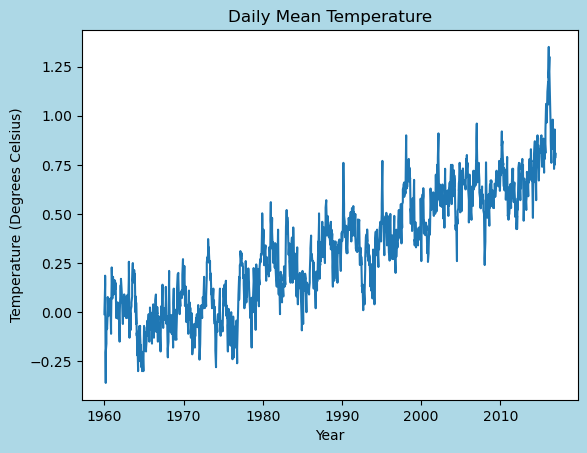

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

datas = pd.read_csv('new_data.csv')
x = datas['Date'].values
y = datas['Mean'].values
plt.plot(x,y)
plt.title('Daily Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.gcf().set_facecolor('lightblue')

#https://datahub.io/core/global-temp

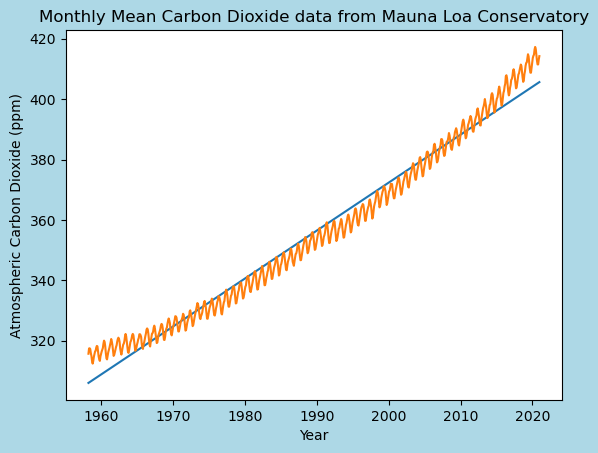

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('co2_mm_mlo (2).csv', comment='#')

dfc = pd.DataFrame(data)

x = dfc['decimal date'].values
y = dfc['average'].values

slope, int = np.polyfit(x, y, 1)

tx = [min(x), max(x)]
ty = [slope * x + int for x in tx]

plt.plot(tx,ty)
plt.title('Monthly Mean Carbon Dioxide data from Mauna Loa Conservatory')
plt.xlabel('Year')
plt.ylabel('Atmospheric Carbon Dioxide (ppm)')
plt.gcf().set_facecolor('lightblue')
plt.plot(x,y)

#https://gml.noaa.gov/ccgg/trends/data.html

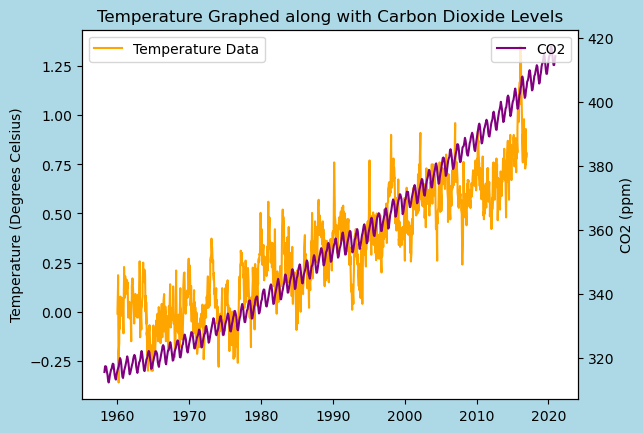

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax1 = plt.subplots()

ax1.plot(datas['Date'], datas['Mean'], label='Temperature Data', color='orange')
ax1.set_ylabel('Temperature (Degrees Celsius)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(data['decimal date'], data['average'], label='CO2', color='purple')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 (ppm)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Temperature Graphed along with Carbon Dioxide Levels')
plt.gcf().set_facecolor('lightblue')
plt.show()


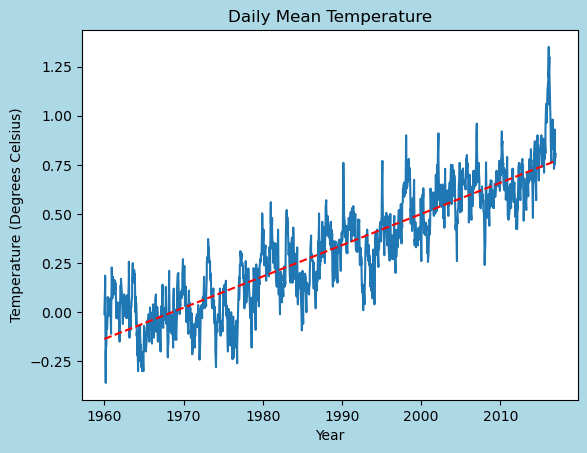

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(datas)

x = df['Date'].values
y = df['Mean'].values

slope, int = np.polyfit(x, y, 1)

tx = [min(x), max(x)]
ty = [slope * x + int for x in tx]


plt.plot(x,y)
plt.plot(tx,ty, color='red', linestyle = '--')
plt.title('Daily Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.gcf().set_facecolor('lightblue')


In [75]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create some sample data
import pandas as pd
x = df['Date'].values
y = df['Mean'].values


# Create a scatter plot
fig = px.scatter(df, x='Date', y='Mean', title='Interactive Temperature')

# Create an empty output widget to display click event info
output = widgets.Output()

# Define a function to handle click events
def handle_click(trace, points, state):
    with output:
        output.clear_output()
        if points.point_inds:
            index = points.point_inds[0]
            x = data.loc[index, 'X']
            y = data.loc[index, 'Y']
            print(f"Clicked point at X={x}, Y={y}")

# Attach the click event handler to the scatter plot
fig.data[0].on_click(handle_click)

# Display the scatter plot and the output widget
display(fig)
display(output)


Output()

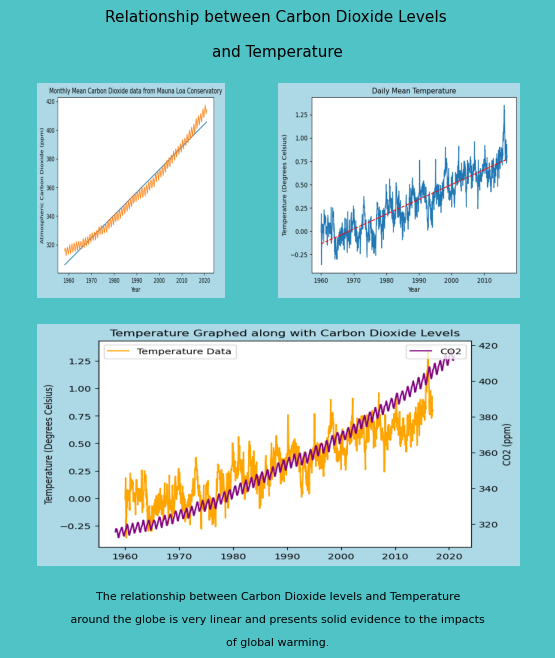

In [100]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a function to show a tooltip when hovering over an image
def show_tooltip(event):
    if event.inaxes == ax:
        for image, tooltip_text in images_with_tooltips:
            if image.contains(event)[0]:
                tooltip.set_text(tooltip_text)
                tooltip.set_position((event.xdata, event.ydata))
                tooltip.set_visible(True)
                fig.canvas.draw_idle()
                return
    tooltip.set_visible(False)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 20)
ax.set_ylim(-13, 10)
ax.axis('off')
fig.set_facecolor('#50C3C7')

ax.text(10, 9, 'Relationship between Carbon Dioxide Levels \n\nand Temperature', fontsize=11, ha='center')

image1 = Image.open('co2_with_trend.png')
image3 = Image.open('temp_vs.co2.png')
image2 = Image.open('temp_with_trend.png')

ax.imshow(image1, extent=(1, 8, 0, 8), zorder=1)
ax.imshow(image2, extent=(10, 19, 0, 8), zorder=1)
ax.imshow(image3, extent=(1, 19, -10, -1), zorder=1)
ax.text(10,-13, 'The relationship between Carbon Dioxide levels and Temperature\n\n around the globe is very linear and presents solid evidence to the impacts \n\nof global warming.', fontsize = 8, ha  ='center')

images_with_tooltips = [(image1, "Tooltip for Image 1"), (image2, "Tooltip for Image 2"), (image3, "Tooltip for Image 3")]

tooltip = ax.annotate("", xy=(0, 0), xytext=(20, 20), textcoords="offset points",
                      bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->"))
tooltip.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", show_tooltip)

plt.show()
